In [1]:
# Import Packages
import os
import pandas as pd
import numpy as np
#import Ngl
#import Nio
import xarray as xr
import netCDF4 as nc
import time
import pandas as pd

#plotting packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import geocat as gc
import geocat.viz as gv
import cmaps

In [2]:
# Set up color table 
# Readin Data should be in the following order

ColorDir = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/"
filename='MidMIO_ModelColors.csv'
MidMioFile = pd.read_csv(filename, header=0, sep=',')
#MidMioFile

#Group by destination
Dest = MidMioFile.groupby("dest")
Dest280 = Dest.get_group(1)
Dest400 = Dest.get_group(2)
Dest560 = Dest.get_group(3)
Dest850 = Dest.get_group(4)


In [3]:
Dest280v2= Dest280.values[:,:]
MioStudyName280=np.asarray(Dest280v2[:,1])
MioStudyR280=np.asarray(Dest280v2[:,2],dtype=np.float64)
MioStudyG280=np.asarray(Dest280v2[:,3],dtype=np.float64)
MioStudyB280=np.asarray(Dest280v2[:,4],dtype=np.float64)

Dest400v2= Dest400.values[:,:]
MioStudyName400=np.asarray(Dest400v2[:,1])
MioStudyR400=np.asarray(Dest400v2[:,2],dtype=np.float64)
MioStudyG400=np.asarray(Dest400v2[:,3],dtype=np.float64)
MioStudyB400=np.asarray(Dest400v2[:,4],dtype=np.float64)

Dest560v2= Dest560.values[:,:]
MioStudyName560=np.asarray(Dest560v2[:,1])
MioStudyR560=np.asarray(Dest560v2[:,2],dtype=np.float64)
MioStudyG560=np.asarray(Dest560v2[:,3],dtype=np.float64)
MioStudyB560=np.asarray(Dest560v2[:,4],dtype=np.float64)

Dest850v2= Dest850.values[:,:]
MioStudyName850=np.asarray(Dest850v2[:,1])
MioStudyR850=np.asarray(Dest850v2[:,2],dtype=np.float64)
MioStudyG850=np.asarray(Dest850v2[:,3],dtype=np.float64)
MioStudyB850=np.asarray(Dest850v2[:,4],dtype=np.float64)

In [4]:
# READ IN Data

DIR = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Converted_data/final/'

case280 = xr.open_dataset(DIR+"MMIO280-1deg-ANN-PE.nc")
case400 = xr.open_dataset(DIR+"MMIO400-1deg-ANN-PE.nc")
case560 = xr.open_dataset(DIR+"MMIO560-1deg-ANN-PE.nc")
case850 = xr.open_dataset(DIR+"MMIO850-1deg-ANN-PE.nc")

lat = case280.lat[:]
lon = case280.lon[:]

pr280 = case280.pr
pr400 = case400.pr
pr560 = case560.pr
pr850 = case850.pr

pr280ZM = pr280.mean(dim='lon', keep_attrs = True)
pr400ZM = pr400.mean(dim='lon', keep_attrs = True)
pr560ZM = pr560.mean(dim='lon', keep_attrs = True)
pr850ZM = pr850.mean(dim='lon', keep_attrs = True)


In [5]:
# Bring in MAP proxy

path = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Converted_data/raw/'
MMIO_MAP = pd.read_csv(path+"MioMIP_MAP_compilation_11122.csv",header=0, sep=',')
MMIO_MAP

,Sort_1L_2EM,MAP,±,Palaeo_lat,Palaeo_360_long,Pal_360_long,Sample Station,start_age_timeslab,end_age_timeslab,Unnamed: 9
0,1,700.0,0.0,56.1815,72.0190,72.0190,1-OP,15.97,11.61,NaN
1,2,1269.5,52.5,41.0840,34.2820,34.2820,Alicik,13.65,12.00,NaN
2,2,1269.0,52.5,39.0570,33.5185,33.5185,Avcikoy,13.65,12.00,NaN
3,2,1360.0,160.0,47.5240,14.8260,14.8260,Baden Sooss,14.70,14.20,NaN
4,2,1252.0,69.5,37.6990,27.0705,27.0705,Bascayir,15.97,13.65,NaN
...,...,...,...,...,...,...,...,...,...,...
85,2,1998.5,129.5,-48.8295,177.9000,177.9000,C45/f0204,15.90,15.10,NaN
86,2,950.0,150.0,36.4130,105.1245,105.1245,Yanwan,16.50,15.00,NaN
87,2,1100.0,NaN,-30.9405,132.5835,132.5835,Alcoota,17.00,14.00,NaN
88,2,765.0,182.0,31.6025,-109.1865,250.8135,CV-NW,16.00,15.00,NaN


In [6]:
Destdata = MMIO_MAP.groupby("Sort_1L_2EM")
Dest1L = Destdata.get_group(1)
Dest2EM = Destdata.get_group(2)
Dest2EM

,Sort_1L_2EM,MAP,±,Palaeo_lat,Palaeo_360_long,Pal_360_long,Sample Station,start_age_timeslab,end_age_timeslab,Unnamed: 9
1,2,1269.5,52.5,41.0840,34.2820,34.2820,Alicik,13.65,12.00,NaN
2,2,1269.0,52.5,39.0570,33.5185,33.5185,Avcikoy,13.65,12.00,NaN
3,2,1360.0,160.0,47.5240,14.8260,14.8260,Baden Sooss,14.70,14.20,NaN
4,2,1252.0,69.5,37.6990,27.0705,27.0705,Bascayir,15.97,13.65,NaN
5,2,1305.5,50.5,43.9755,18.8385,18.8385,Bela Stena,12.70,12.40,NaN
...,...,...,...,...,...,...,...,...,...,...
85,2,1998.5,129.5,-48.8295,177.9000,177.9000,C45/f0204,15.90,15.10,NaN
86,2,950.0,150.0,36.4130,105.1245,105.1245,Yanwan,16.50,15.00,NaN
87,2,1100.0,NaN,-30.9405,132.5835,132.5835,Alcoota,17.00,14.00,NaN
88,2,765.0,182.0,31.6025,-109.1865,250.8135,CV-NW,16.00,15.00,NaN


In [7]:
# Change Dataframe to Dataarray

MMIO_MAPv2 = Dest2EM .values[:,:]
MIOMAP = np.asarray(MMIO_MAPv2[:,1],dtype=np.float64)
MIOerr = np.asarray(MMIO_MAPv2[:,2],dtype=np.float64)
MIOLat = np.asarray(MMIO_MAPv2[:,3],dtype=np.float64)
MIOLon = np.asarray(MMIO_MAPv2[:,5],dtype=np.float64)
MIOMAPmin = MIOMAP-MIOerr
MIOMAPmax = MIOMAP+MIOerr

/glade/u/apps/opt/conda/envs/npl-2022b/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/glade/u/apps/opt/conda/envs/npl-2022b/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


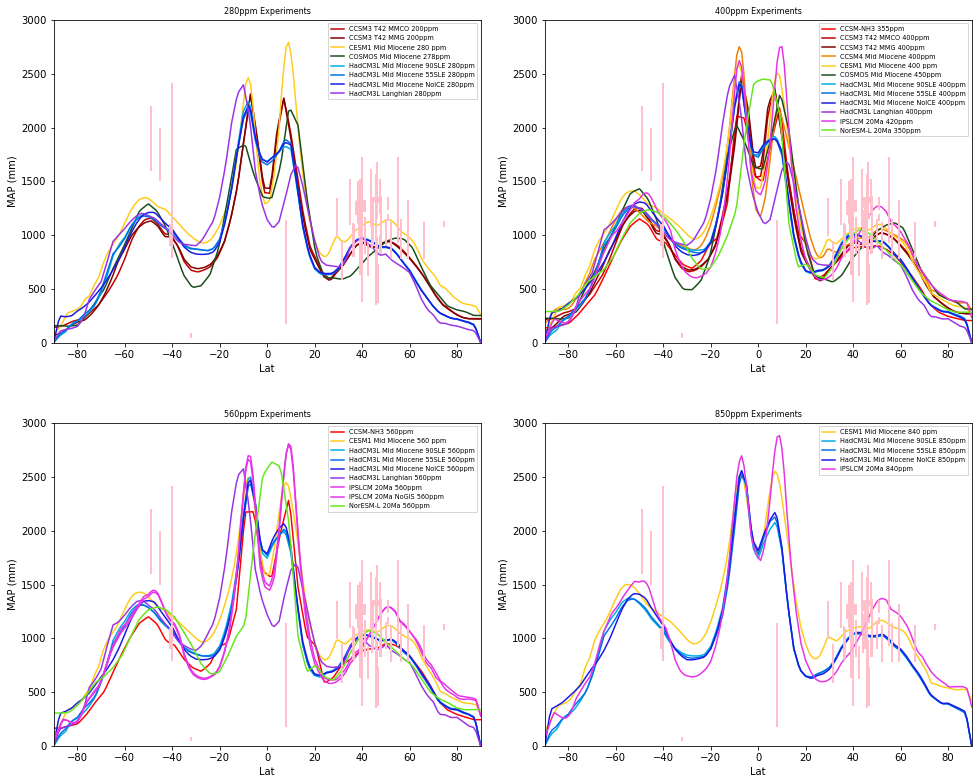

In [10]:
ncols = 2
nrows = 2

# plot with various axes scales

#fig = plt.figure(figsize=(10, 10), dpi=100) #figsize(weight,height)
#plt.figure()

EnsambleName = ("280ppm Experiments","400ppm Experiments","560ppm Experiments","850ppm Experiments")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))

for i in range(0, len(Dest280)):
                if i <= 11:
                    ax1.plot(lats,pr280ZM[i,:],linestyle='-',
                            color=(MioStudyR280[i],MioStudyG280[i],MioStudyB280[i]),label=MioStudyName280[i])
                    ax1.set_title(EnsambleName[0], fontsize=8)
                    ax1.legend(loc="upper right", bbox_to_anchor=(1.0,1), fancybox=False, 
                                    shadow=False, ncol=1, fontsize=6.5)
                    ax1.errorbar(MIOLat, MIOMAP,xerr=None,yerr=[MIOMAP-MIOMAPmin, MIOMAPmax-MIOMAP], ls='none', color='pink')
                    
for i in range(0, len(Dest400)):
                if i <= 11:
                    ax2.plot(lats,pr400ZM[i,:],linestyle='-',
                            color=(MioStudyR400[i],MioStudyG400[i],MioStudyB400[i]),label=MioStudyName400[i])
                    ax2.legend(loc="upper right", bbox_to_anchor=(1.0,1), fancybox=False, 
                                    shadow=False, ncol=1, fontsize=6.5)
                    ax2.set_title(EnsambleName[1], fontsize=8)
                    ax2.errorbar(MIOLat, MIOMAP,xerr=None,yerr=[MIOMAP-MIOMAPmin, MIOMAPmax-MIOMAP], ls='none', color='pink')

for i in range(0, len(Dest560)):
                if i <= 11:
                    ax3.plot(lats,pr560ZM[i,:],linestyle='-',
                            color=(MioStudyR560[i],MioStudyG560[i],MioStudyB560[i]),label=MioStudyName560[i])
                    ax3.legend(loc="upper right", bbox_to_anchor=(1.0,1), fancybox=False, 
                                    shadow=False, ncol=1, fontsize=6.5)
                    ax3.set_title(EnsambleName[2], fontsize=8)
                    ax3.errorbar(MIOLat, MIOMAP,xerr=None,yerr=[MIOMAP-MIOMAPmin, MIOMAPmax-MIOMAP], ls='none', color='pink')


for i in range(0, len(Dest850)):
                if i <= 11:
                    ax4.plot(lats,pr850ZM[i,:],linestyle='-',
                            color=(MioStudyR850[i],MioStudyG850[i],MioStudyB850[i]),label=MioStudyName850[i])
                    ax4.legend(loc="upper right", bbox_to_anchor=(1.0,1), fancybox=False, 
                                    shadow=False, ncol=1, fontsize=6.5)
                    ax4.set_title(EnsambleName[3], fontsize=8)
                    ax4.errorbar(MIOLat, MIOMAP,xerr=None,yerr=[MIOMAP-MIOMAPmin, MIOMAPmax-MIOMAP], ls='none', color='pink')
                  
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.15)


ax1.set_ylabel("MAP (mm)")
ax2.set_ylabel("MAP (mm)")
ax3.set_ylabel("MAP (mm)")
ax4.set_ylabel("MAP (mm)")

ax1.set_xlim((-90,90))
ax2.set_xlim((-90,90))
ax3.set_xlim((-90,90))
ax4.set_xlim((-90,90))


ax1.set_xlabel("Lat")
ax2.set_xlabel("Lat")
ax3.set_xlabel("Lat")
ax4.set_xlabel("Lat")

ax1.set_ylim((0,3000))
ax2.set_ylim((0,3000))
ax3.set_ylim((0,3000))
ax4.set_ylim((0,3000))

plt.show()
#DirPlt = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/"
#plt.savefig(DirPlt+'MAP_zonal.pdf', format='pdf')

In [8]:
# Calculate model mean
prMM280 = np.mean(pr280, axis=0)
prMM400 = np.mean(pr400, axis=0)
prMM560 = np.mean(pr560, axis=0)
prMM850 = np.mean(pr850, axis=0)

#create new data array with all 4 miocene runs

prset = xr.Dataset({'prMM280': xr.DataArray(prMM280[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                         'prMM400': xr.DataArray(prMM400[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                         'prMM560': xr.DataArray(prMM560[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                         'prMM850': xr.DataArray(prMM850[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                        },
    attrs = {'Global_attr': 'Created by PA 2023'}
    )
prsetary = prset.to_array()
prNEW=prsetary.rename({'variable': 'exp,'})

In [9]:
#Read in updated Herold boundary conditions
MioMIPDIR = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/MioMIP1/"
filename='miocene_topo_pollard_antscape_dolan_0.5x0.5.nc'
Herold_updated=xr.open_dataset(MioMIPDIR+filename,decode_times=False)

# Calculate Model-Data RMSE

In [10]:
# part 1: find min/max value in adjacent grid cells
import math


modelmaxes=[]
modelmins=[]

modellons=prsetary.lon #assumes 0-360
modellats=prsetary.lat

originlat=MIOLat #(data) lats
originlon=MIOLon  #(data) lons

paleolats=[MIOMAP,MIOLat]
np.shape(paleolats)
paleolons=[MIOMAP,MIOLon]
np.shape(paleolons)


if modellats.max() >90: #automatically convert lats to -90,90
    modellats[:]-=90
# if originlat.max() >90:
#     originlat[:]-=90
    
def find_nearest(modelcoords, datacoord): #return index of model coord nearest to data coord (either lat or lon, not both at once)
    array = np.asarray(modelcoords)
    indx = (np.abs(modelcoords - datacoord)).argmin()
    return indx

for ex in range(4): #all experiments
    modelmaxes.append([])
    modelmins.append([])
    for i in range(len(MIOLat)): #for each proxy datum
        tmpmax=[]
        tmpmin=[]
            
        ref_lat=find_nearest(modellats,MIOLat[i])
        ref_lon=find_nearest(modellons,MIOLon[i])
        if ref_lon==359: 

             #for each model, find the max/min value in the 9 adjacent model grid cells, considering both early/late data locations
                tmpmax.append( np.nanmax( [ prNEW[ex,ref_lat+1,ref_lon-1], \
                                prNEW[ex,ref_lat+1,ref_lon], \
                                prNEW[ex,ref_lat+1,0,ex], \
                                prNEW[ex,ref_lat,ref_lon-1], \
                                prNEW[ex,ref_lat,ref_lon], \
                                prNEW[ex,ref_lat,0,ex], \
                                prNEW[ex,ref_lat-1,ref_lon-1], \
                                prNEW[ex,ref_lat-1,ref_lon], \
                                prNEW[ex,ref_lat-1,0]  ] ) )
                tmpmin.append( np.nanmin( [ prNEW[ex,ref_lat+1,ref_lon-1], \
                                prNEW[ex,ref_lat+1,ref_lon], \
                                prNEW[ex,ref_lat+1,0], \
                                prNEW[ex,ref_lat,ref_lon-1], \
                                prNEW[ex,ref_lat,ref_lon], \
                                prNEW[ex,ref_lat,0], \
                                prNEW[ex,ref_lat-1,ref_lon-1], \
                                prNEW[ex,ref_lat-1,ref_lon], \
                                prNEW[ex,ref_lat-1,0] ] ) )
        else:
                tmpmax.append( np.nanmax( [ prNEW[ex,ref_lat+1,ref_lon-1], \
                                prNEW[ex,ref_lat+1,ref_lon], \
                                prNEW[ex,ref_lat+1,ref_lon+1], \
                                prNEW[ex,ref_lat,ref_lon-1], \
                                prNEW[ex,ref_lat,ref_lon], \
                                prNEW[ex,ref_lat,ref_lon+1], \
                                prNEW[ex,ref_lat-1,ref_lon-1], \
                                prNEW[ex,ref_lat-1,ref_lon], \
                                prNEW[ex,ref_lat-1,ref_lon+1] ] ) )
                tmpmin.append( np.nanmin( [ prNEW[ex,ref_lat+1,ref_lon-1], \
                                prNEW[ex,ref_lat+1,ref_lon], \
                                prNEW[ex,ref_lat+1,ref_lon+1], \
                                prNEW[ex,ref_lat,ref_lon-1], \
                                prNEW[ex,ref_lat,ref_lon], \
                                prNEW[ex,ref_lat,ref_lon+1], \
                                prNEW[ex,ref_lat-1,ref_lon-1], \
                                prNEW[ex,ref_lat-1,ref_lon], \
                                prNEW[ex,ref_lat-1,ref_lon+1] ] ) )
        modelmaxes[ex].append(max(tmpmax))
        modelmins[ex].append(min(tmpmin))
#np.shape(modelmaxes)
np.shape(modelmins)

(4, 70)

In [11]:
# part 2: find biases based on overlapping uncertainty bounds

bias=[]

for ex in range(4):
    
    bias.append([])
    
    for i in range(len(MIOMAP)):
        diff1 = MIOMAPmin[i]-modelmaxes[ex][i]
        
        diff2 = modelmins[ex][i]-MIOMAPmax[i]
        
        if diff1>0:
            prbias=-diff1
        elif diff2>0:
            prbias=diff2
        elif np.isnan(diff2):
            prbias=np.nan
        else:
            prbias=0
        bias[ex].append(prbias)
        
biasmean=np.nanmean(bias,axis=1)
#print(biasmean)
biasrmse=np.sqrt(np.nanmean(np.square(bias),axis=1))
print(biasrmse) 
print(biasmean)
#np.shape(bias)

[344.0558323  337.2160958  308.1773436  323.67108713]
[-247.65236542 -229.6551182  -194.24015963 -190.68842437]


In [21]:
def add_axes(fig, grid_space):
    ax = fig.add_subplot(grid_space, projection=ccrs.PlateCarree())


    # Usa geocat.viz.util convenience function to set axes parameters
    gv.set_axes_limits_and_ticks(ax,
                                     ylim=(-60, 65),
                                     xlim=(-130, 180),
                                     xticks=np.arange(-170, 180, 30),
                                     yticks=np.arange(-90, 91, 30))

    # Use geocat.viz.util convenience function to add minor and major tick lines
    gv.add_major_minor_ticks(ax, labelsize=12)

    # Use geocat.viz.util convenience function to make plots look like NCL
    # plots by using latitude, longitude tick labels
    gv.add_lat_lon_ticklabels(ax)

    # Remove the degree symbol from tick labels
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    return ax

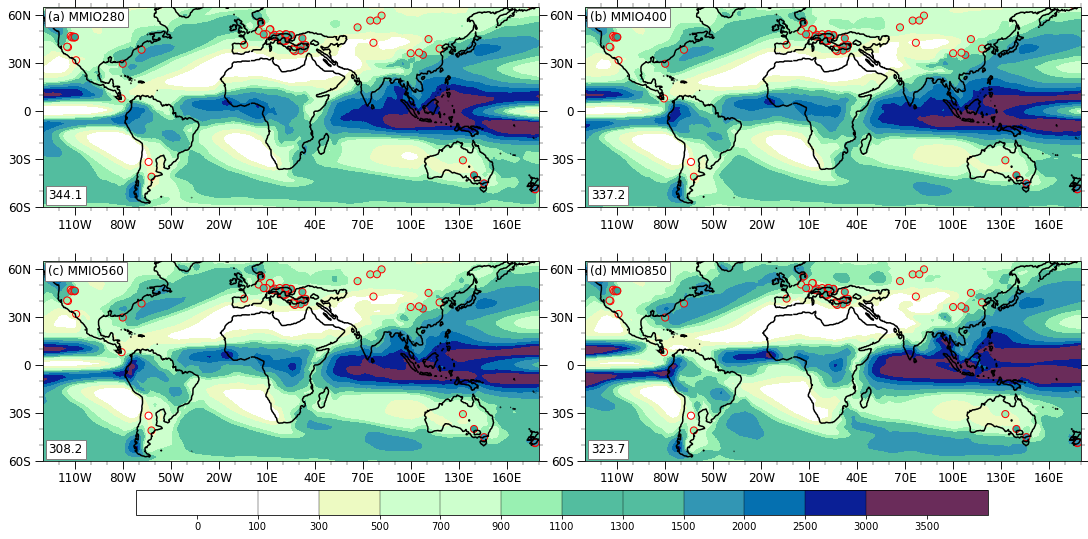

In [22]:
# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(15, 17), constrained_layout=True)

# Create gridspec to hold six subplots
grid = fig.add_gridspec(ncols=2, nrows=5)

# Add the axes
ax1 = add_axes(fig, grid[0, 0])
ax2 = add_axes(fig, grid[0, 1])
ax3 = add_axes(fig, grid[1, 0])
ax4 = add_axes(fig, grid[1, 1])


# misc
#CNlevels = np.arange(0,3000,100) #Set contour levels
#cmap = plt.get_cmap('precip_11lev')# Colormap
newcmp = cmaps.precip_11lev # Colormap
name = ["(a) MMIO280","(b) MMIO400","(c) MMIO560","(d) MMIO850"] 
#norm = mcolors.BoundaryNorm(boundaries=CNlevels, ncolors=34)

contour_levels = [0, 100, 300, 500, 700, 900, 1100, 1300, 1500, 2000, 2500,3000,3500]
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=15)
cyclic_data, cyclic_lon = cutil.add_cyclic_point(prsetary, coord=prsetary.lon)


for i, axes in enumerate([ax1, ax2, ax3, ax4]):
    # Contourf plot data
    cf = axes.contourf(cyclic_lon,
                            prsetary.lat,
                            cyclic_data[i],
                            vmin=0,
                            vmax=3500,
                            cmap=newcmp,
                            levels=contour_levels,
                            extend="both")
    #add Proxy data
    axes.scatter( MIOLon,MIOLat, c=MIOMAP,marker='o', edgecolors='red', vmin=0, vmax=3500, cmap=newcmp, s=50)
    # Add Paleo Outline
    axes.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
    # Add lower text box
    axes.text(0.01,.93,name[i],horizontalalignment='left',transform=axes.transAxes,fontsize=12,
              bbox=dict(boxstyle='square, pad=0.25',facecolor='white',edgecolor='gray'),zorder=5)
    #add RMSE
    axes.text(-105,-55, np.around(biasrmse[i],decimals=1),horizontalalignment='right',fontsize=12,
              bbox=dict(boxstyle='square, pad=0.25',facecolor='white',edgecolor='gray'),)

# Set colorbounds of norm
colorbounds = contour_levels
# Use cmap to create a norm and mappable for colorbar to be correctly plotted
#norm = mcolors.BoundaryNorm(colorbounds, newcmp.N)
#mappable = cm.ScalarMappable(norm=norm, cmap=newcmp)

# Add colorbar for all six plots
fig.colorbar(cf,
             ax=[ax1, ax2, ax3, ax4],
            ticks=colorbounds,
             drawedges=True,
             orientation='horizontal',
             shrink=0.82,
             pad=0.01,
             aspect=35,
             extendfrac='auto',
             extendrect=True)

# Show plot
plt.show()


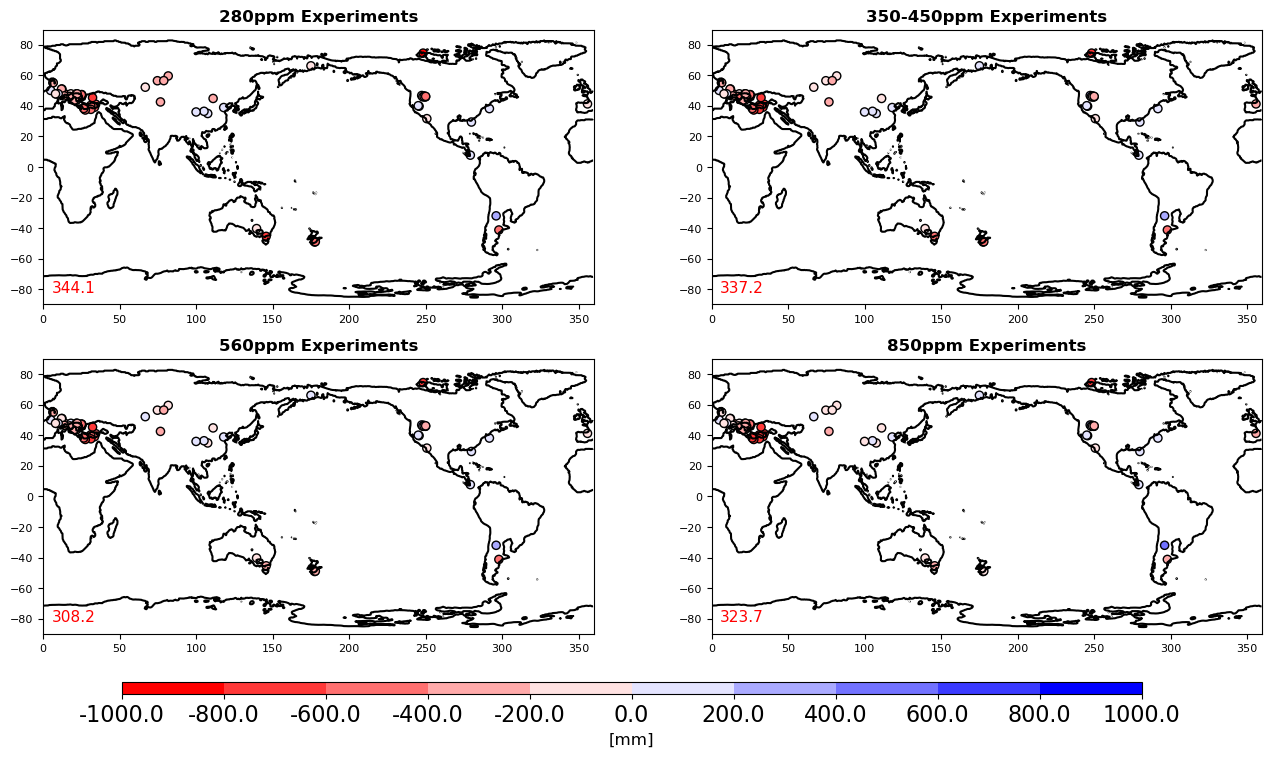

In [23]:
import matplotlib.colors as mcolors

# Plot RMSE of Annual Precipitation 

EnsambleName = ("280ppm Experiments","350-450ppm Experiments","560ppm Experiments","850ppm Experiments")
en_list = list(EnsambleName)

cmap = 'bwr_r'#'coolwarm_r' #
#contour_levels=[-4,-3,-2,-1.5,-1,-0.5,-0.25,0.,0.25,0.5,1,1.5,2,3,4]
contour_levels = np.linspace(-1000,1000,11)
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)

ncols = 2
nrows = 2
fig = plt.figure(figsize=(17, 8), dpi=100) #figsize(weight,height)
for i in range(len(bias[:])): 
            ax = fig.add_subplot(nrows, ncols, i+1)
            ax.set_aspect('equal')
            plt.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')            
            plt.title(EnsambleName[i],fontsize=12,fontweight='bold')
            #if bias[i][:]==0:
                #cf=plt.scatter( MIOLon,MIOLat, c='black', marker='o', edgecolors='k', s=50)
            #else:
                #print(bias[i][:])
            cf=plt.scatter( MIOLon,MIOLat, c=bias[i][:], marker='o', edgecolors='k' , norm=norm, cmap=cmap, s=35)
            plt.xlim([0, 360])
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax.text(5.5,-82, np.around(biasrmse[i],decimals=1),fontsize=11,color='red')


fig.subplots_adjust(wspace=0.03,hspace=0.2)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
cbar = plt.colorbar(cf,cax=cbar_ax1,ticks=contour_levels, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
cbar.ax.set_xticklabels(contour_levels)
#plt.title('Pr XCO2 (unit:mm/day)',fontsize=12,fontweight='bold')
cbar.set_label('%s' % '[mm]',size=12)

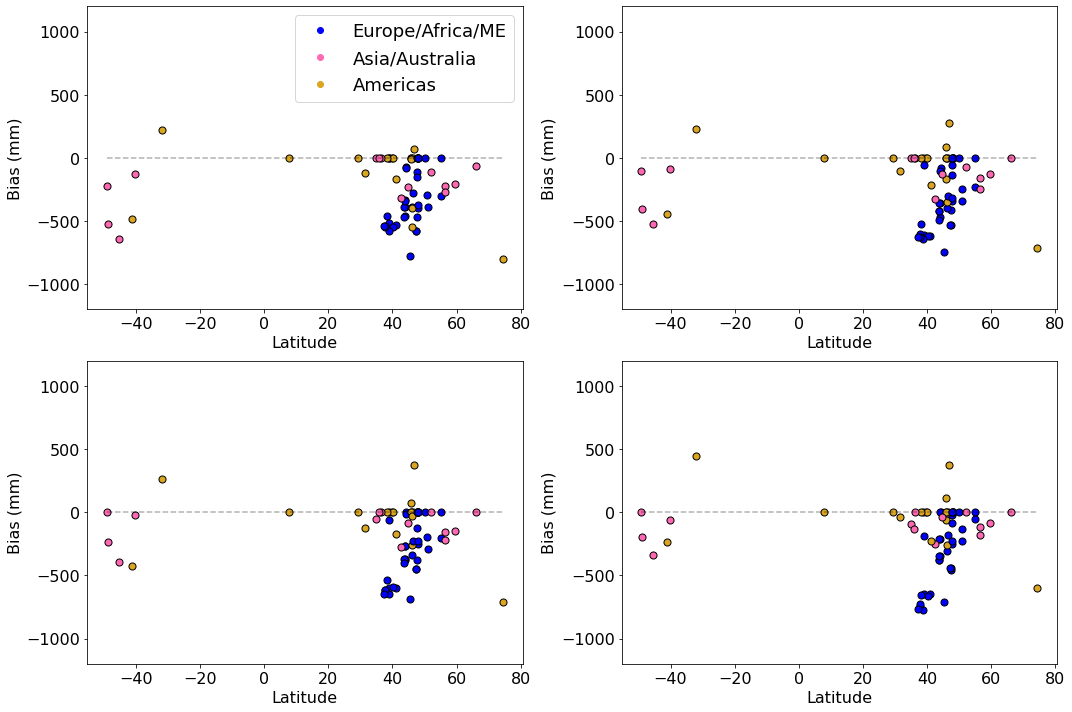

In [24]:
# 1) scatter plot with latitude on the x-axis and the bias on the y-axis as a function on CO2
from matplotlib.lines import Line2D

plt.figure(figsize=(15,10))
name = ["(a) MMIO280","(b) MMIO400","(c) MMIO560","(d) MMIO850"] 
#cols=['tab:blue','tab:yellow','tab:gold']
cols=['blue','hotpink','goldenrod']
labs=['Europe/Africa/ME','Asia/Australia','Americas']
for i in range(4):
    plt.subplot(2,2,(i+1))
    for j in range(np.shape(bias)[1]):
        lon2=MIOLon[j]
        if (lon2>-20) & (lon2<60):
            lab='Europe/Africa/ME'
            col=cols[0]
        elif (lon2>60) & (lon2<180):
            lab='Asia/Australia'
            col=cols[1]
        else:
            lab='Americas'
            col=cols[2]
        plt.scatter(MIOLat[j],bias[i][j],marker='o',edgecolors='k',s=50,color=col)
    #if i>1:
    plt.xlabel('Latitude',fontsize=16)
    plt.ylabel('Bias (mm)',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim([-1200,1200])
    #plt.title(name[i],loc='left',fontsize=16)
    plt.hlines(0,xmin=np.min(MIOLat),xmax=np.max(MIOLat),color='black',linestyle='--',alpha=0.3)
    if i==0:
        leg=[]
        for i in range(3):
            leg.append(Line2D([0,0], [0,0], color=cols[i], marker='o', lw=2, label=labs[i],linestyle=''))
        plt.legend(handles=leg,fontsize=18)
plt.tight_layout()
plt.show()

In [1]:
import os

os.system('jupyter nbconvert --to html MioMIP-Hydro_Master_ModelDataComp.ipynb')

[NbConvertApp] Converting notebook MioMIP-Hydro_Master_ModelDataComp.ipynb to html
[NbConvertApp] Writing 1754478 bytes to MioMIP-Hydro_Master_ModelDataComp.html


0